In [1]:
%matplotlib nbagg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wcorr import WeightedCorr
laender_short={"Schleswig-Holstein":"SH",
"Hamburg":"HH",
"Niedersachsen":"NI",
"Bremen":"HB",
"Nordrhein-Westfalen":"NRW",
"Hessen":"HE",
"Rheinland-Pfalz":"RP",
"Baden-Württemberg":"BW",
"Bayern":"BY",
"Saarland":"SAAR",
"Berlin":"BE",
"Brandenburg":"BB",
"Mecklenburg-Vorpommern":"MV",
"Sachsen":"SA",
"Sachsen-Anhalt":"S-AN",
"Thüringen":"TH",
}

In [2]:
#Datasource https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Sterbefaelle-Lebenserwartung/Tabellen/sonderauswertung-sterbefaelle.html?nn=209016
# 22.11.2021
df = pd.read_csv('sterbefaelle.csv')
df.head(1)
#df.columns
#df = df.set_index('Bundesland')

Jahr          Bundesland    1    2    3    4    5    6    7    8  ...  44  \
0  2021  Schleswig-Holstein  803  794  849  826  777  797  819  677  ... NaN   

   45  46  47  48  49  50  51  52   53  
0 NaN NaN NaN NaN NaN NaN NaN NaN  NaN  

[1 rows x 55 columns]

In [3]:
# Use values from 2016-2019 and take avg per week
sterb_norm = df[df.Jahr<2020].groupby(['Bundesland']).mean()
#Jahr does not make sense after aggregation
sterb_norm = sterb_norm.drop('Jahr', axis=1)
sterb_norm.head(10)


1        2        3        4        5        6  \
Bundesland                                                                     
Baden-Württemberg       2273.00  2332.25  2332.25  2392.00  2390.25  2400.00   
Bayern                  2824.00  2883.00  2881.50  2878.50  2933.50  2897.25   
Berlin                   702.50   724.50   751.50   733.25   765.75   774.25   
Brandenburg              663.25   660.50   675.75   648.50   691.00   705.75   
Bremen                   164.25   164.00   148.25   174.75   172.75   166.00   
Hamburg                  374.25   371.00   379.00   385.75   386.25   370.25   
Hessen                  1343.00  1370.50  1375.00  1399.75  1452.00  1442.00   
Mecklenburg-Vorpommern   452.00   455.50   439.50   450.00   449.50   429.75   
Niedersachsen           1973.50  1966.50  1979.75  1996.25  2057.25  2024.00   
Nordrhein-Westfalen     4191.50  4305.75  4238.75  4357.75  4489.75  4513.75   

                              7        8        9       10  ...       43  \
Bundesland                                                  ...            
Baden-Württemberg       2394.25  2448.75  2520.25  2440.25  ...  2046.50   
Bayern                  2929.50  2949.75  3007.50  2965.25  ...  2482.25   
Berlin                   780.00   813.25   796.75   763.50  ...   630.75   
Brandenburg              718.50   735.00   719.25   716.75  ...   573.75   
Bremen                   174.25   176.50   191.75   172.50  ...   145.25   
Hamburg                  375.75   382.25   392.25   374.00  ...   348.50   
Hessen                  1437.00  1501.00  1505.00  1503.50  ...  1220.50   
Mecklenburg-Vorpommern   471.75   489.75   455.25   480.25  ...   387.00   
Niedersachsen           2075.50  2111.25  2223.25  2165.50  ...  1725.75   
Nordrhein-Westfalen     4549.00  4568.00  4780.25  4786.50  ...  3757.50   

                             44       45       46       47       48       49  \
Bundesland                                                                     
Baden-Württemberg       2041.50  2136.00  2111.50  2129.75  2143.00  2200.75   
Bayern                  2498.25  2544.75  2572.00  2599.00  2580.75  2641.50   
Berlin                   663.25   642.00   650.75   653.50   670.50   681.25   
Brandenburg              576.75   598.00   596.25   585.50   607.00   655.50   
Bremen                   151.00   152.00   161.00   154.00   152.25   161.25   
Hamburg                  300.00   331.25   362.75   352.25   350.25   348.00   
Hessen                  1226.50  1248.00  1280.75  1279.75  1306.00  1319.00   
Mecklenburg-Vorpommern   385.50   395.50   400.75   404.75   405.75   410.25   
Niedersachsen           1736.50  1774.50  1795.00  1799.00  1840.00  1884.25   
Nordrhein-Westfalen     3764.50  3841.75  3892.25  3980.00  3967.75  4133.75   

                             50       51       52  
Bundesland                                         
Baden-Württemberg       2198.50  2221.50  2219.50  
Bayern                  2729.00  2749.75  2723.50  
Berlin                   684.00   682.00   702.00  
Brandenburg              614.75   651.25   639.50  
Bremen                   157.00   148.50   148.25  
Hamburg                  364.50   354.75   351.50  
Hessen                  1324.50  1324.50  1333.75  
Mecklenburg-Vorpommern   441.50   434.25   410.50  
Niedersachsen           1866.00  1910.00  1847.00  
Nordrhein-Westfalen     4066.00  4205.75  4054.75  

[10 rows x 52 columns]

In [4]:
sterb_21 = df[df.Jahr==2021].groupby(['Bundesland']).mean()
uebersterb = sterb_21 / sterb_norm
uebersterb = uebersterb.mean(axis=1)
uebersterb.name = "Übersterblichkeit"
# Next line plots:
# uebersterb.sort_values().plot(style='.')

In [5]:
#Datasource Rbert Koch Institut
# https://github.com/robert-koch-institut/COVID-19-Impfungen_in_Deutschland
df_impf = pd.read_csv('Impfquoten.csv')
df_impf = df_impf[df_impf.Bundesland!="Deutschland"].drop('Datum', axis=1) # Drop column 'Datum', row "Deutschland"
df_impf = df_impf.set_index('Bundesland')
# next line plots
# df_impf.sort_values(by='Impfquote').plot(style='.')

# Merge both dataset into a combined one
df_total = pd.merge(df_impf,uebersterb, left_index=True, right_index=True)

In [6]:
# Unweighted correlation is
correlation = df_total.corr(method="pearson")
# Weighted correlation is
#TODO: get population numbers WeightedCorr()

<IPython.core.display.Javascript object>


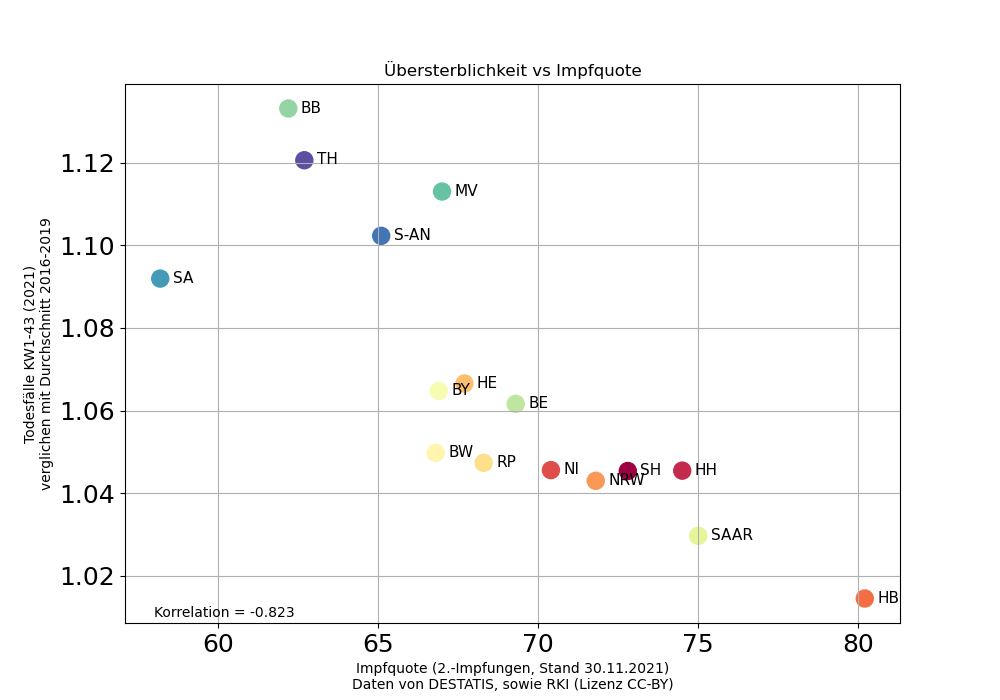

Text(58, 1.01, 'Korrelation = -0.823')

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
plot1 = df_total.plot.scatter(x="Impfquote",y="Übersterblichkeit",title="Übersterblichkeit vs Impfquote", grid=True,
              ax=ax, style='o', legend=False, s=150, fontsize=18,
              color=range(len(df_total)), colormap='Spectral')
#ax.legend(plot1,["1","2"],fancybox=True)
#df_total.head()

for k, v in df_total.iterrows():
    ax.annotate(laender_short[k], v,
                xytext=(9,-3), textcoords='offset points',
                family='sans-serif', fontsize=11)
ax.set(title='Übersterblichkeit vs Impfquote',
       ylabel='Todesfälle KW1-43 (2021)\nverglichen mit Durchschnitt 2016-2019',
       xlabel="Impfquote (2.-Impfungen, Stand 30.11.2021)\nDaten von DESTATIS, sowie RKI (Lizenz CC-BY)")
ax.text(58,1.01,"Korrelation = %0.3f"%correlation["Übersterblichkeit"]["Impfquote"])